# Google Code In: TensorFlow.js: Convert a model - Submission

* Maanav Singh




**Note:**

This is a simple regression model that I created to predict Turkey Production Data in the U.S.; All of this is my work except the dataset which I found on Data.gov

Skip down to the second to last code block to the javascript conversion.

In [0]:
#Created by Maanav Singh
#CSV File can be found on pchsdatascience.com (I designed this website for a school club)

#Data from Data.gov

!pip install tensorflowjs
try:
  import tensorflowjs
except:
  print("tfjs already imported")
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import files
import io
import math
import requests


print(tf.test.gpu_device_name())


#Uncomment if you want to manually load a csv
'''
print("Please Load Production CSV File")
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded["ProductionData.csv"]))
'''

# Fetch Dataset from Our Website
response = requests.get('https://pchsdatascience.com/wp-content/uploads/2019/12/ProductionData.csv')
file_object = io.StringIO(response.content.decode('utf-8'))
data = pd.read_csv(file_object)

#Load CSV Data
data.head()

#Remove Header and Footer from file
d1 = data.iloc[2:698]
dates = d1.iloc[:,0]

config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 2} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

     |████████████████████████████████| 61kB 3.2MB/s 
     |████████████████████████████████| 81kB 6.4MB/s 
     |████████████████████████████████| 17.3MB 9.8MB/s 
     |████████████████████████████████| 256kB 59.6MB/s 
     |████████████████████████████████| 901kB 60.0MB/s 
     |████████████████████████████████| 675kB 56.9MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32853 sha256=412bf8e0b324bcdc07caf9821179241a9b9da276c6d3695fa84b944ffefc501b
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
  Created wheel for regex: filename=regex-2019.12.9-cp36-cp36m-linux_x86_64.whl size=609166 sha256=e0bd32e753572fbda31dd8b210ec7898633e4735038a385516a5f160d7630dd7
  Stored in directory: /root/.cache/pip/wheels/0d/fb/b3/a89169557229468c49ca64f6839418f22461f6ee0a74f342b1
Successfully built PyInquirer regex
ERROR: google-colab 1.0.0 has requirement six~=1.12.0, but you'll have six 1.11.0 which is inco

Using TensorFlow backend.


/device:GPU:0


In [0]:
#Create Pandas Dataframe
turkey = d1.iloc[:,13]
pd.to_numeric(turkey)
dataset = pd.DataFrame({'Date': dates, 'Weight': turkey})
dataset = dataset.iloc[::-1]
dataset.index = np.arange(0, len(dataset))
dataset.index.name = "Month number"

#view dataframe
dataset

,Date,Weight
Month number,,
0,Jan-1960,22.1
1,Feb-1960,14.0
2,Mar-1960,13.4
3,Apr-1960,16.2
4,May-1960,27.1
...,...,...
691,Aug-2017,543.1
692,Sep-2017,467.9
693,Oct-2017,554.2


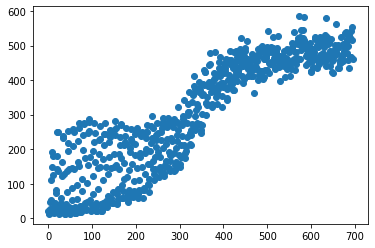

In [0]:
#Create Array stroring Monthly Data from data frame
arrdata = dataset.to_numpy()
arrMonth = []
arrDate = []
arrWeight = []

for i in range(len(arrdata)):
    arrMonth.append(i)
    arrDate.append(arrdata[i][0])
    arrWeight.append(float(arrdata[i][1]))

#plot monthly production data
plt.scatter(arrMonth, arrWeight)
plt.show()



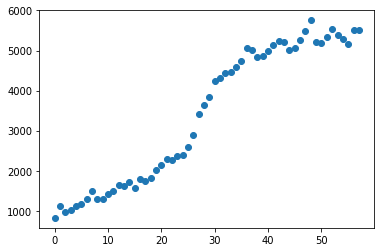

In [0]:
arrWeightyr = []
arrYear = []

#Sum Monthly Data to create yearly data
for i in range(58):
    sum = 0
    for j in range(0,11):
        sum += float(arrWeight[12*i + j])
    arrWeightyr.append(sum)
    arrYear.append(i)
   
plt.scatter(arrYear, arrWeightyr)

In [0]:

x_train = []
y_train = []
x_val = []
y_val = []

#Split data in half for training and validation

#Use monthly data to create training data (Give model as much data as possible)
for i in arrMonth:
    if i % 2 == 0:
        x_train.append(i)
        y_train.append(arrWeight[i])
    else:
        x_val.append(i)
        y_val.append(arrWeight[i])


Important Note on Model:

Since we are dealing with fairly large numbers and our loss function is Mean Squared Error our gradient and loss is going to be massively large, to reduce the size of these numbers we will use a process called batch normalization. This will scale all the neuron values down with respect to each other's magnitudes.

tf.keras.layers.BatchNormalization(momentum=0.99, epsilon=0.001)

Since it is possible for a previous neuron to be zero, we need to add a small number to prevent division by zero this is done though "epsilon" which is essentially just a small number we set.




In [0]:
#Define Sequential Machine Learning Model


#In order to save time training - we have already trained the model for for you and will just download the model from our servers
#Set this option to false if you want to retrain live (might take a while)
LoadPretrainedModel = False

if LoadPretrainedModel == True:
  model_data = requests.get('https://pchsdatascience.com/wp-content/uploads/2019/12/ProductionData.csv')
  model_file = io.StringIO(response.content.decode('utf-8'))
  
else:
  model = tf.keras.models.Sequential(
      [tf.keras.layers.Dense(10, input_shape=[1], activation='relu'),
      tf.keras.layers.BatchNormalization(momentum=0.99, epsilon=0.001),
      tf.keras.layers.Dense(90, activation='relu'),
      tf.keras.layers.Dense(1)
      ])

  #sgd = tf.optimizers.SGD(lr=.1, decay=1e-6, momentum=0.9, nesterov=True)
  model.compile(optimizer='adam', loss='mean_squared_error', metrics=["accuracy"])

  #adjust number of epochs to suit processing power and required training
  model.fit(x_train, y_train, epochs=3000, validation_data=(x_val,y_val))



Train on 348 samples, validate on 348 samples
Epoch 1/3000
348/348 [==============================] - 3s 9ms/sample - loss: 122359.1263 - acc: 0.0000e+00 - val_loss: 121370.6912 - val_acc: 0.0000e+00
Epoch 2/3000
348/348 [==============================] - 0s 255us/sample - loss: 122063.1819 - acc: 0.0000e+00 - val_loss: 120691.3369 - val_acc: 0.0000e+00
Epoch 3/3000
348/348 [==============================] - 0s 218us/sample - loss: 121774.5248 - acc: 0.0000e+00 - val_loss: 120182.5874 - val_acc: 0.0000e+00
Epoch 4/3000
348/348 [==============================] - 0s 204us/sample - loss: 121483.1835 - acc: 0.0000e+00 - val_loss: 119760.3119 - val_acc: 0.0000e+00
Epoch 5/3000
348/348 [==============================] - 0s 213us/sample - loss: 121171.5891 - acc: 0.0000e+00 - val_loss: 119310.3574 - val_acc: 0.0000e+00
Epoch 6/3000
348/348 [==============================] - 0s 246us/sample - loss: 120813.7369 - acc: 0.0000e+00 - val_loss: 118836.6268 - val_acc: 0.0000e+00
Epoch 7/3000
348/348

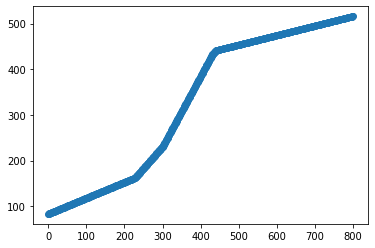

In [0]:
arrx = []
arry = []
arryyr = []

#Generate graph of the model
for i in range(0,800):
    arrx.append(i)
    prediction = model.predict([i]) 
    arry.append(prediction[0][0])
    arryyr.append(prediction[0][0] * 12)

#graph plot
plt.scatter(arrx, arry)

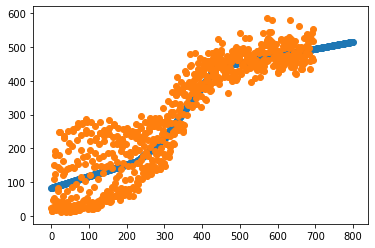

In [0]:
#graph model with data overlain to visually see how well the model fits
plt.scatter(arrx, arry)
plt.scatter(arrMonth, arrWeight)
plt.show()

#Seems to fit the data pretty well!

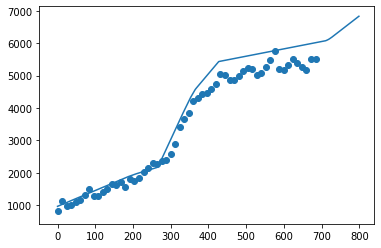

In [0]:
arrYM = []
for i in arrYear:
  arrYM.append(i*12)
  
plt.plot(arrx, arryyr)
plt.scatter(arrYM, arrWeightyr)
plt.show()

In [0]:
#Allow user to enter a year to predict:

def ytm(x):
    return((x-1960) * 12)

print("Enter a year to predict production:")
inval = int(input())
sum = 0  
for i in range(ytm(inval), ytm(inval) + 12):
  pred = model.predict([i])
  sum += pred[0][0]

print("Predicted Average Monthly Production Prediction (In millions of pounds): ", sum / 12)
print("Predicted Annual Production (In millions of pounds): ", sum)

try:
  yp = arrWeightyr[inval - 1960]
  print("The actual annual production weight: ", yp)
  print("The percent error on the prediction was: ", 100*(abs(yp - sum)/yp), "%")
except:
  print("No Production Data was found for this Date")



Enter a year to predict production:
2006
Predicted Average Monthly Production Prediction (In millions of pounds):  465.5751317342122
Predicted Annual Production (In millions of pounds):  5586.901580810547
The actual annual production weight:  5252.5
The percent error on the prediction was:  6.366522242942349 %


In [0]:
#export trained model for future use

model.save("turkey.h5")
print("Saved model to disk")

#files.download('turkey.h5')


Saved model to disk


In [0]:
#-------Convert to tensorflow.js model-----------#


#Create 2 separate directories to save js models to
!mkdir tfjs_files_graph
!mkdir tfks_files_layer

#convert to tfjs graph model
!tensorflowjs_converter --input_format keras --output_format tfjs_graph_model turkey.h5 tfjs_files_graph/
#convert to tfjs layer model
!tensorflowjs_converter --input_format keras --output_format tfjs_graph_model turkey.h5 tfjs_files_layer/




2019-12-12 11:53:37.663176: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2019-12-12 11:53:37.667520: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-12-12 11:53:37.668035: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla T4 major: 7 minor: 5 memoryClockRate(GHz): 1.59
pciBusID: 0000:00:04.0
2019-12-12 11:53:37.668277: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2019-12-12 11:53:37.669942: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2019-12-12 11:53:37.671518: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2019-

TFjs Graph models are fixed and once loaded into java script return a **tf.Frozen model**. In constrast, the tfjs layer model returns a **tf.Model** which is able to be trained after being loaded into javascript.

tfjs graph models are also generally faster due to certain optimizations (notably quantization for prediction speed) which are found with the Grappler API.

In [0]:
!ls

sample_data  tfjs_files_graph  tfjs_files_layer  tfks_files_layer  turkey.h5
